# Importing Libraries

In [1]:
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter

# Open the RGBA image

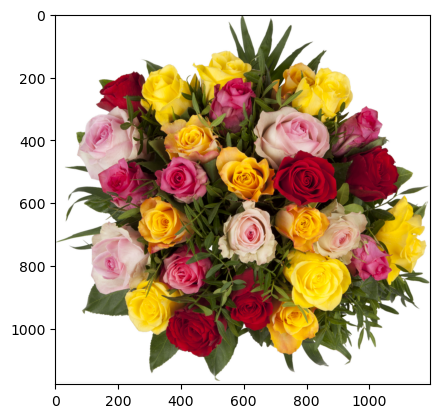

In [2]:
image = Image.open("Image.png")
plt.imshow(image)

In [3]:
print(image.format)
print(image.size)
print(image.mode)

PNG
(1195, 1177)
RGBA


# Convert the image to a NumPy Array and Remove an alpha channel

In [4]:
image_3D_rgba = np.asarray(image)
image_3D_rgb = image_3D_rgba[:, :, :3]

In [5]:
print("Type: ", type(image_3D_rgba))
print("Shape: ", image_3D_rgba.shape)
print("Number of Dimensions: ", image_3D_rgba.ndim)
print("Type: ", type(image_3D_rgb))
print("Shape: ", image_3D_rgb.shape)
print("Number of Dimensions: ", image_3D_rgb.ndim)

Type:  <class 'numpy.ndarray'>
Shape:  (1177, 1195, 4)
Number of Dimensions:  3
Type:  <class 'numpy.ndarray'>
Shape:  (1177, 1195, 3)
Number of Dimensions:  3


# Reshape the Image Array to (n_pixels, 3 or 4), where n_pixels = height * width

In [6]:
height, width, _ = image_3D_rgb.shape

n_pixels = height * width
image_2D_rgb = image_3D_rgb.reshape(n_pixels, 3)
image_2D_rgba = image_3D_rgba.reshape(n_pixels, 4)

In [7]:
print("Type(RGB): ", type(image_2D_rgb))
print("Shape(RGB): ", image_2D_rgb.shape)
print("Number of Dimensions(RGB): ", image_2D_rgb.ndim)
print("Type(RGBA): ", type(image_2D_rgba))
print("Shape(RGBA): ", image_2D_rgba.shape)
print("Number of Dimensions(RGBA): ", image_2D_rgba.ndim)

Type(RGB):  <class 'numpy.ndarray'>
Shape(RGB):  (1406515, 3)
Number of Dimensions(RGB):  2
Type(RGBA):  <class 'numpy.ndarray'>
Shape(RGBA):  (1406515, 4)
Number of Dimensions(RGBA):  2


# K-means for RGB Image Array and Elbow Method

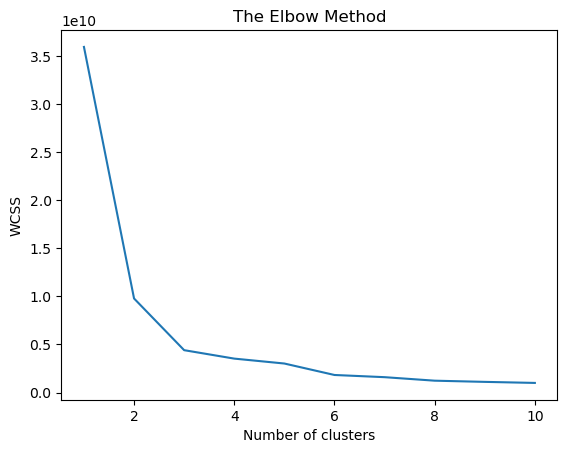

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(image_2D_rgb)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# K-means for RGBA Image Array and Elbow Method

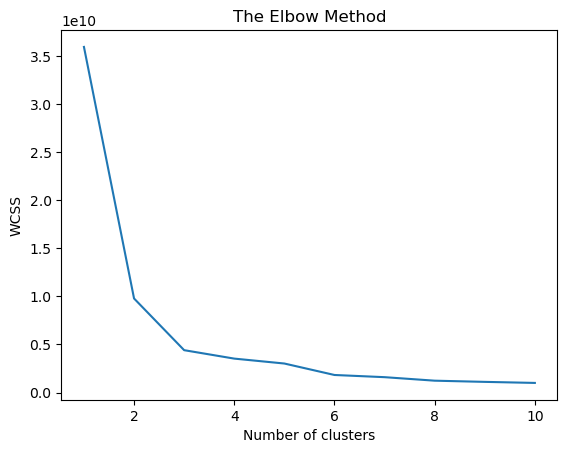

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(image_2D_rgba)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means Clustering with scikit-learn

### Clustering with k=3

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(image_2D_rgb)
labels = kmeans.labels_
labels_count = Counter(labels)
rgb_cols = kmeans.cluster_centers_.round(0).astype(int)
img_quant = np.reshape(rgb_cols[labels],(height, width, 3))

In [11]:
print(labels_count)
print(kmeans.cluster_centers_)

Counter({1: 594440, 0: 464618, 2: 347457})
[[ 92.60552996  49.66741813  31.2727692 ]
 [251.98827512 249.66223319 248.97843179]
 [218.96846887 165.24679787  71.007711  ]]


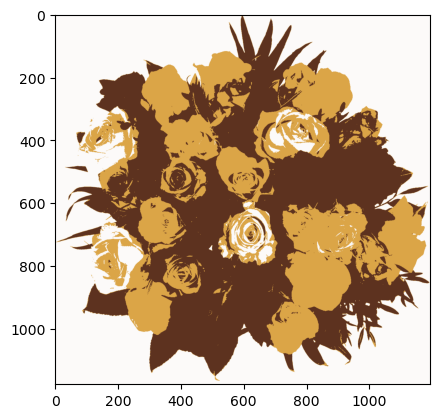

In [12]:
plt.imshow(img_quant)

### Clustering with k=10

In [13]:
kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
kmeans.fit(image_2D_rgb)
labels = kmeans.labels_
labels_count = Counter(labels)
rgb_cols = kmeans.cluster_centers_.round(0).astype(int)
img_quant = np.reshape(rgb_cols[labels],(height, width, 3))

In [14]:
print(labels_count)
print(kmeans.cluster_centers_)

Counter({1: 540458, 7: 132756, 4: 132332, 6: 117426, 0: 111818, 3: 89673, 9: 84235, 5: 77799, 8: 60461, 2: 59557})
[[ 39.3249274   24.79962421   8.88003344]
 [254.73712404 254.73144723 254.7137063 ]
 [189.99383119  79.83905913 102.73016032]
 [110.73957988 106.41856274  57.80393588]
 [243.96698694 201.09371816  28.27182568]
 [209.03704653 162.85901807 125.11165235]
 [139.33780999   9.42597765  34.51427306]
 [ 73.26239468  71.94088488  27.88483772]
 [201.43477901 131.37612478  13.74990075]
 [222.9750161  193.82332387 181.02484079]]


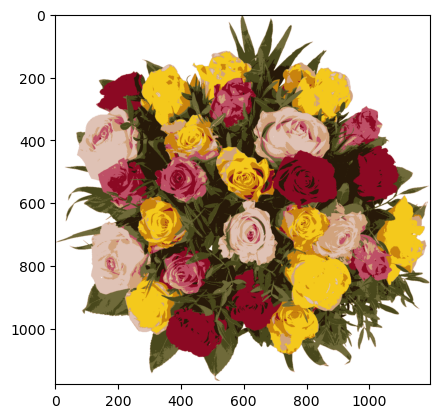

In [15]:
plt.imshow(img_quant)

### Clustering with k=20

In [16]:
kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 42)
kmeans.fit(image_2D_rgb)
labels = kmeans.labels_
labels_count = Counter(labels)
rgb_cols = kmeans.cluster_centers_.round(0).astype(int)
img_quant = np.reshape(rgb_cols[labels],(height, width, 3))

In [17]:
print(labels_count)
print(kmeans.cluster_centers_)

Counter({1: 539571, 3: 91322, 10: 84490, 7: 72599, 17: 64090, 11: 63090, 19: 51250, 9: 46910, 13: 45387, 8: 41216, 18: 40557, 5: 35261, 16: 33041, 4: 31542, 15: 31291, 14: 30166, 12: 29015, 0: 28638, 2: 28458, 6: 18621})
[[ 79.0947096    9.68980923  23.49170272]
 [254.77680602 254.77418912 254.76305806]
 [149.37323074 128.35184074  76.4791924 ]
 [ 79.06772646  79.88447309  33.72526266]
 [244.57986926 208.35292251  54.1762074 ]
 [198.46455868 149.99414029 129.45326388]
 [182.36739282   5.99400525  51.27875609]
 [ 55.54075304  54.14727353  14.06879991]
 [194.26575648 118.13992288   5.54162524]
 [225.62444482 202.75640588 194.69104458]
 [242.8249568  194.28982505   2.74600507]
 [ 26.95328733  19.66160036   4.83213618]
 [218.28093219 161.9262247   57.85641397]
 [116.9430019   12.3798563   32.22310061]
 [245.86349322 217.50177346  99.84536082]
 [169.38215096  57.6427636   78.64263583]
 [203.23358769  91.81670906 122.03866885]
 [102.97850239 103.76347916  55.99206001]
 [152.61795922   4.0223

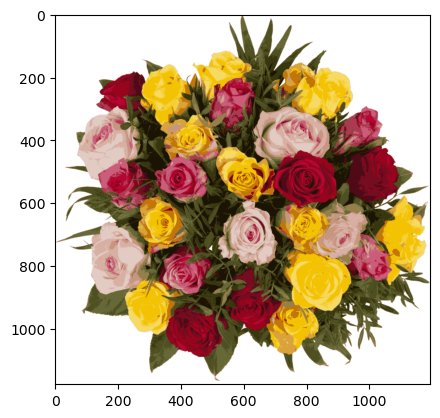

In [18]:
plt.imshow(img_quant)

# Apply K-Means Clustering from scratch

## Calculate the Euclidean distance between two vectors

In [19]:
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1-point2)

## K-Means Function

In [20]:
def k_means(k, data, tolerance=0.001, max_iterations=500):
    random_indices = random.sample(range(len(data)), k)
    centroids = {i: data[idx] for i, idx in enumerate(random_indices)}

    for i in range(max_iterations):
        classes = {j: [] for j in range(k)}
        labels = np.zeros(len(data))

        # Assign each data point to the nearest centroid
        for idx, point in enumerate(data):
            distances = [euclidean_distance(point, centroids[centroid_idx]) for centroid_idx in centroids]
            cluster_idx = np.argmin(distances)
            classes[cluster_idx].append(point)
            labels[idx] = cluster_idx

        previous_centroids = dict(centroids)

        # Update centroids by computing the mean of all points in the cluster
        for cluster_idx in classes:
            if len(classes[cluster_idx]) > 0:
                centroids[cluster_idx] = np.average(classes[cluster_idx], axis=0)
        
        # Check for convergence
        isOptimal = True
        for centroid_idx in centroids:
            original_centroid = previous_centroids[centroid_idx]
            current_centroid = centroids[centroid_idx]
            if np.sum((current_centroid - original_centroid) / (original_centroid + 1e-6) * 100.0) > tolerance:
                isOptimal = False

        if isOptimal:
            break

    return labels, centroids
    

### Clustering with K = 3

In [21]:
labels, centroids = k_means(3, image_2D_rgb, max_iterations=5)
labels_count = Counter(labels)

clustered_image = np.zeros((n_pixels, 3), dtype=np.uint8)
for idx in range(len(labels)):
    clustered_image[idx] = centroids[labels[idx]]
clustered_image = clustered_image.reshape(height, width, 3)

In [22]:
print(labels_count)
print(centroids)

Counter({0.0: 602172, 1.0: 475613, 2.0: 328730})
{0: array([251.56629169, 248.80310111, 248.03186465]), 1: array([94.5030119 , 50.62388118, 32.40009209]), 2: array([220.71834636, 167.6119916 ,  68.48098744])}


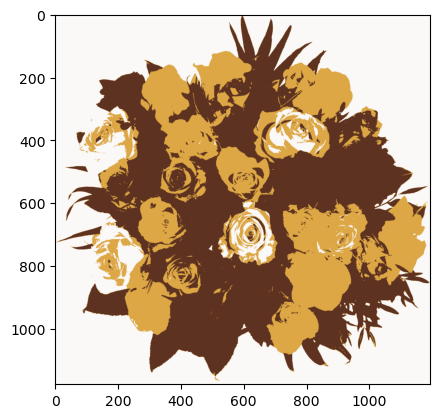

In [23]:
plt.imshow(clustered_image)

### Clustering with K = 10

In [24]:
labels, centroids = k_means(10, image_2D_rgb, max_iterations=5)
labels_count = Counter(labels)

clustered_image = np.zeros((n_pixels, 3), dtype=np.uint8)
for idx in range(len(labels)):
    clustered_image[idx] = centroids[labels[idx]]
clustered_image = clustered_image.reshape(height, width, 3)

In [25]:
print(labels_count)
print(centroids)

Counter({6.0: 539748, 9.0: 272554, 1.0: 183259, 2.0: 77340, 3.0: 63277, 7.0: 63060, 5.0: 56375, 8.0: 54306, 4.0: 51944, 0.0: 44652})
{0: array([180.15251277, 144.12832572,  93.85089134]), 1: array([130.45683977,  63.44679934,  44.8449244 ]), 2: array([246.73621671, 202.59560383,   8.43841479]), 3: array([213.67242442, 146.76697694,  11.76108223]), 4: array([196.40686124,  75.09583398, 107.38893809]), 5: array([243.2343592 , 209.75948559,  83.34261641]), 6: array([254.76920896, 254.76605194, 254.75388329]), 7: array([211.79869965, 165.42243895, 155.6504916 ]), 8: array([224.93950945, 200.79203035, 191.74489007]), 9: array([63.97937289, 41.85962048, 20.0548772 ])}


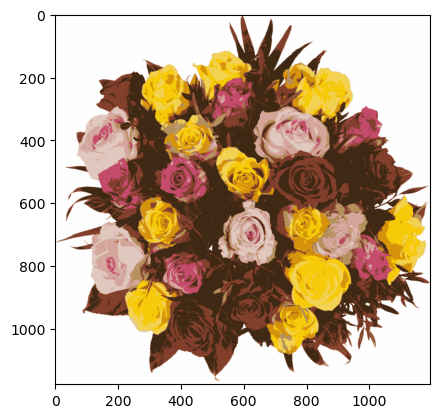

In [26]:
plt.imshow(clustered_image)

### Clustering with K = 20

In [27]:
labels, centroids = k_means(20, image_2D_rgb, max_iterations=5)
labels_count = Counter(labels)

clustered_image = np.zeros((n_pixels, 3), dtype=np.uint8)
for idx in range(len(labels)):
    clustered_image[idx] = centroids[labels[idx]]
clustered_image = clustered_image.reshape(height, width, 3)

In [28]:
print(labels_count)
print(centroids)

Counter({18.0: 557261, 5.0: 148752, 11.0: 126827, 9.0: 115004, 13.0: 74077, 14.0: 54919, 2.0: 47174, 0.0: 45948, 4.0: 38869, 10.0: 38137, 3.0: 32433, 1.0: 28952, 6.0: 26799, 16.0: 22515, 12.0: 21061, 7.0: 12237, 15.0: 9321, 8.0: 4093, 17.0: 2136})
{0: array([139.09340994, 115.9967572 ,  66.59045007]), 1: array([227.35296353, 206.27321083, 199.38156259]), 2: array([196.70485861,  80.14658498, 110.77407046]), 3: array([195.83310209, 153.03878765, 133.70681096]), 4: array([241.17196223, 202.43831845,  60.26625331]), 5: array([58.77428203, 42.08288292, 16.21021566]), 6: array([217.42535169, 158.43482966, 163.39785067]), 7: array([251.9262074 , 251.91844406, 251.853232  ]), 8: array([231.07231859, 229.72245297, 226.97972148]), 9: array([145.21009704,  12.01466036,  36.33482314]), 10: array([218.05315048, 189.41896321, 174.20103836]), 11: array([88.49318363, 89.47206825, 42.73390524]), 12: array([249.45349224, 224.64958929, 101.42647548]), 13: array([246.21416904, 200.62047599,   4.12624701]

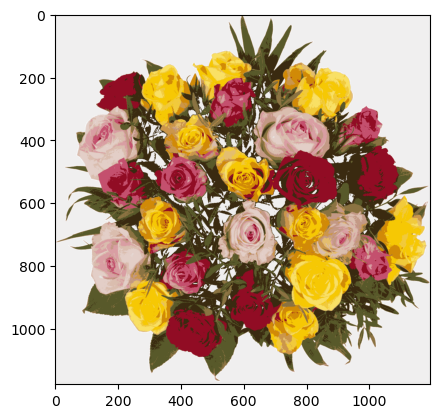

In [29]:
plt.imshow(clustered_image)

# Reference
https://github.com/aihubprojects/Machine-Learning-From-Scratch/blob/master/K-Means%20from%20Scratch.ipynb